In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('../data/data.csv')
data = data.fillna(0)

p_data = data[data.group == 'P']
i_data = data[data.group == 'I']

In [3]:
i_data

,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,is_base
2,I1,I,0,0.0,0.002533,0.002533,4.018987e+07,1.0,19.0,0.42,False
3,I2,I,0,0.0,0.001267,0.001267,3.665494e+07,1.0,19.0,0.42,False
4,I3,I,0,0.0,0.000000,0.000000,0.000000e+00,0.0,19.0,0.42,False
7,I1,I,1,0.0,0.002533,0.002533,4.024292e+07,1.0,19.0,0.42,False
8,I2,I,1,0.0,0.001267,0.001267,3.666387e+07,1.0,19.0,0.42,False
...,...,...,...,...,...,...,...,...,...,...,...
28911,I2,I,27,0.0,0.001267,0.001267,2.961056e+07,1.0,0.0,0.00,True
28914,I1,I,28,0.0,0.002533,0.002533,3.294920e+07,1.0,0.0,0.00,True
28915,I2,I,28,0.0,0.001267,0.001267,2.947955e+07,1.0,0.0,0.00,True
28918,I1,I,29,0.0,0.002533,0.002533,3.281453e+07,1.0,0.0,0.00,True


In [4]:
for inj in i_data.cat.unique():
    inj_data = i_data[i_data.cat == inj].drop(columns=['cat', 'group', 
                                                       'oil', 'liquid', 
                                                       'is_base'])

    p_data = p_data.merge(inj_data, 
                          on=['start_lag', 'coef', 'date'], 
                          suffixes=('', f'_{inj}'),
                          how='left')

In [5]:
p_data

,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,is_base,water_I1,bhp_I1,status_I1,water_I2,bhp_I2,status_I2,water_I3,bhp_I3,status_I3
0,P1,P,0,-0.001621,0.000000,-0.001621,20000000.0,1.0,19.0,0.42,False,0.002533,4.018987e+07,1.0,0.001267,3.665494e+07,1.0,0.0,0.0,0.0
1,P2,P,0,-0.001903,0.000000,-0.001903,20000000.0,1.0,19.0,0.42,False,0.002533,4.018987e+07,1.0,0.001267,3.665494e+07,1.0,0.0,0.0,0.0
2,P1,P,1,-0.001502,0.000000,-0.001502,20000000.0,1.0,19.0,0.42,False,0.002533,4.024292e+07,1.0,0.001267,3.666387e+07,1.0,0.0,0.0,0.0
3,P2,P,1,-0.001747,0.000000,-0.001747,20000000.0,1.0,19.0,0.42,False,0.002533,4.024292e+07,1.0,0.001267,3.666387e+07,1.0,0.0,0.0,0.0
4,P1,P,2,-0.001493,0.000000,-0.001493,20000000.0,1.0,19.0,0.42,False,0.002533,4.058030e+07,1.0,0.001267,3.689916e+07,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11575,P2,P,27,-0.000251,-0.001899,-0.002150,20000000.0,1.0,0.0,0.00,True,0.002533,3.309469e+07,1.0,0.001267,2.961056e+07,1.0,NaN,NaN,NaN
11576,P1,P,28,-0.000359,-0.001302,-0.001661,20000000.0,1.0,0.0,0.00,True,0.002533,3.294920e+07,1.0,0.001267,2.947955e+07,1.0,NaN,NaN,NaN
11577,P2,P,28,-0.000240,-0.001902,-0.002143,20000000.0,1.0,0.0,0.00,True,0.002533,3.294920e+07,1.0,0.001267,2.947955e+07,1.0,NaN,NaN,NaN
11578,P1,P,29,-0.000345,-0.001319,-0.001665,20000000.0,1.0,0.0,0.00,True,0.002533,3.281453e+07,1.0,0.001267,2.935853e+07,1.0,NaN,NaN,NaN


In [6]:
data_init = p_data.copy()

In [7]:
baseline = data_init[data_init.is_base].drop('is_base', axis=1).reset_index(drop=True)

In [8]:
baseline.head()

,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,water_I1,bhp_I1,status_I1,water_I2,bhp_I2,status_I2,water_I3,bhp_I3,status_I3
0,P1,P,0,-0.001621,0.0,-0.001621,20000000.0,1.0,0.0,0.0,0.002533,4.018987e+07,1.0,0.001267,3.665494e+07,1.0,NaN,NaN,NaN
1,P2,P,0,-0.001903,0.0,-0.001903,20000000.0,1.0,0.0,0.0,0.002533,4.018987e+07,1.0,0.001267,3.665494e+07,1.0,NaN,NaN,NaN
2,P1,P,1,-0.001502,0.0,-0.001502,20000000.0,1.0,0.0,0.0,0.002533,4.024292e+07,1.0,0.001267,3.666387e+07,1.0,NaN,NaN,NaN
3,P2,P,1,-0.001747,0.0,-0.001747,20000000.0,1.0,0.0,0.0,0.002533,4.024292e+07,1.0,0.001267,3.666387e+07,1.0,NaN,NaN,NaN
4,P1,P,2,-0.001493,0.0,-0.001493,20000000.0,1.0,0.0,0.0,0.002533,4.058030e+07,1.0,0.001267,3.689916e+07,1.0,NaN,NaN,NaN


In [9]:
non_baseline = data_init[~data_init.is_base].drop('is_base', axis=1).reset_index(drop=True)
non_baseline.head()

,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,water_I1,bhp_I1,status_I1,water_I2,bhp_I2,status_I2,water_I3,bhp_I3,status_I3
0,P1,P,0,-0.001621,0.0,-0.001621,20000000.0,1.0,19.0,0.42,0.002533,4.018987e+07,1.0,0.001267,3.665494e+07,1.0,0.0,0.0,0.0
1,P2,P,0,-0.001903,0.0,-0.001903,20000000.0,1.0,19.0,0.42,0.002533,4.018987e+07,1.0,0.001267,3.665494e+07,1.0,0.0,0.0,0.0
2,P1,P,1,-0.001502,0.0,-0.001502,20000000.0,1.0,19.0,0.42,0.002533,4.024292e+07,1.0,0.001267,3.666387e+07,1.0,0.0,0.0,0.0
3,P2,P,1,-0.001747,0.0,-0.001747,20000000.0,1.0,19.0,0.42,0.002533,4.024292e+07,1.0,0.001267,3.666387e+07,1.0,0.0,0.0,0.0
4,P1,P,2,-0.001493,0.0,-0.001493,20000000.0,1.0,19.0,0.42,0.002533,4.058030e+07,1.0,0.001267,3.689916e+07,1.0,0.0,0.0,0.0


In [10]:
baseline.columns

Index(['cat', 'group', 'date', 'oil', 'water', 'liquid', 'bhp', 'status',
       'start_lag', 'coef', 'water_I1', 'bhp_I1', 'status_I1', 'water_I2',
       'bhp_I2', 'status_I2', 'water_I3', 'bhp_I3', 'status_I3'],
      dtype='object')

In [11]:
baseline.start_lag.unique(), baseline.coef.unique()

(array([0.]), array([0.]))

In [12]:
baseline.head()

,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,water_I1,bhp_I1,status_I1,water_I2,bhp_I2,status_I2,water_I3,bhp_I3,status_I3
0,P1,P,0,-0.001621,0.0,-0.001621,20000000.0,1.0,0.0,0.0,0.002533,4.018987e+07,1.0,0.001267,3.665494e+07,1.0,NaN,NaN,NaN
1,P2,P,0,-0.001903,0.0,-0.001903,20000000.0,1.0,0.0,0.0,0.002533,4.018987e+07,1.0,0.001267,3.665494e+07,1.0,NaN,NaN,NaN
2,P1,P,1,-0.001502,0.0,-0.001502,20000000.0,1.0,0.0,0.0,0.002533,4.024292e+07,1.0,0.001267,3.666387e+07,1.0,NaN,NaN,NaN
3,P2,P,1,-0.001747,0.0,-0.001747,20000000.0,1.0,0.0,0.0,0.002533,4.024292e+07,1.0,0.001267,3.666387e+07,1.0,NaN,NaN,NaN
4,P1,P,2,-0.001493,0.0,-0.001493,20000000.0,1.0,0.0,0.0,0.002533,4.058030e+07,1.0,0.001267,3.689916e+07,1.0,NaN,NaN,NaN


In [13]:
baseline = baseline.drop(columns=['start_lag', 'coef', 'group', 'status', 'water_I3', 'bhp_I3'])
non_baseline = non_baseline.merge(baseline, 
                                    on=['cat', 'date'], 
                                    suffixes=('', '_base'), 
                                    how='left')

non_baseline = non_baseline.drop(columns=['group'])
non_baseline['cat'] = non_baseline['cat'].apply(lambda x: int(x[1]))
non_baseline.head()

,cat,date,oil,water,liquid,bhp,status,start_lag,coef,water_I1,...,water_base,liquid_base,bhp_base,water_I1_base,bhp_I1_base,status_I1_base,water_I2_base,bhp_I2_base,status_I2_base,status_I3_base
0,1,0,-0.001621,0.0,-0.001621,20000000.0,1.0,19.0,0.42,0.002533,...,0.0,-0.001621,20000000.0,0.002533,4.018987e+07,1.0,0.001267,3.665494e+07,1.0,NaN
1,2,0,-0.001903,0.0,-0.001903,20000000.0,1.0,19.0,0.42,0.002533,...,0.0,-0.001903,20000000.0,0.002533,4.018987e+07,1.0,0.001267,3.665494e+07,1.0,NaN
2,1,1,-0.001502,0.0,-0.001502,20000000.0,1.0,19.0,0.42,0.002533,...,0.0,-0.001502,20000000.0,0.002533,4.024292e+07,1.0,0.001267,3.666387e+07,1.0,NaN
3,2,1,-0.001747,0.0,-0.001747,20000000.0,1.0,19.0,0.42,0.002533,...,0.0,-0.001747,20000000.0,0.002533,4.024292e+07,1.0,0.001267,3.666387e+07,1.0,NaN
4,1,2,-0.001493,0.0,-0.001493,20000000.0,1.0,19.0,0.42,0.002533,...,0.0,-0.001493,20000000.0,0.002533,4.058030e+07,1.0,0.001267,3.689916e+07,1.0,NaN


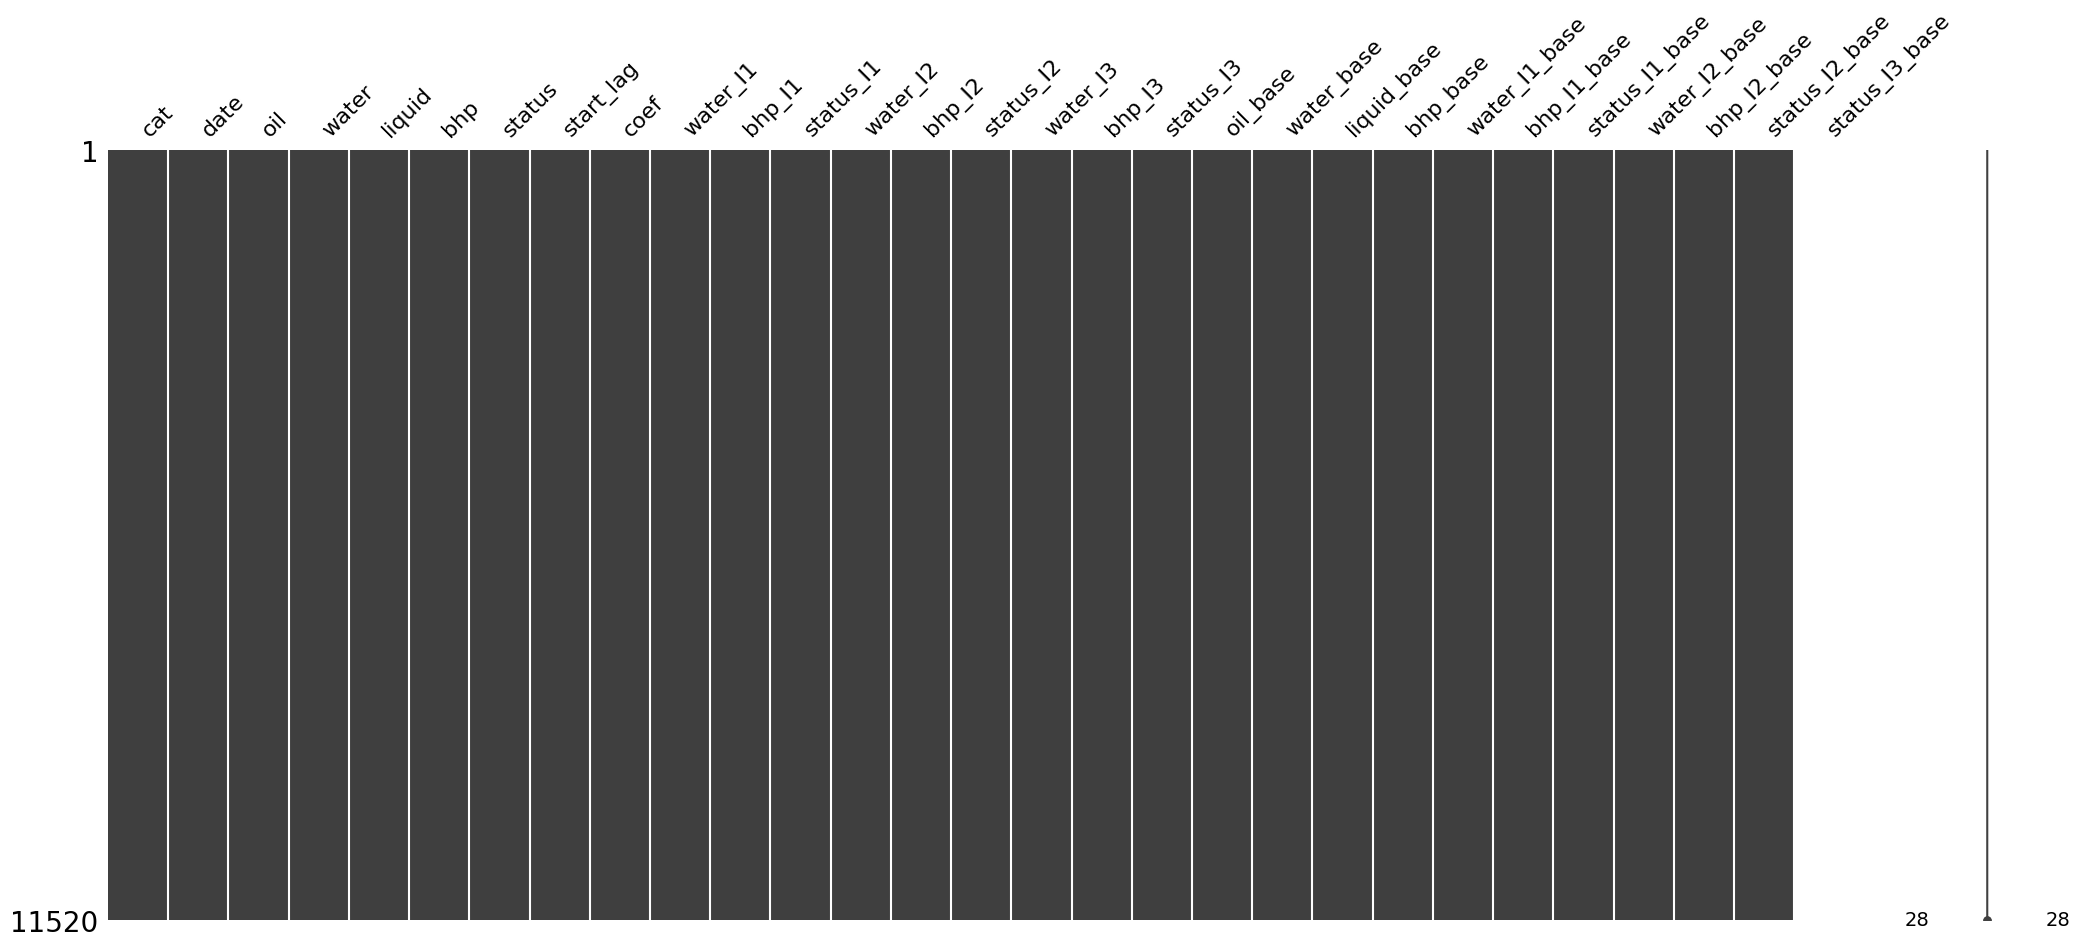

In [14]:
import missingno as msno

msno.matrix(non_baseline)
plt.show()

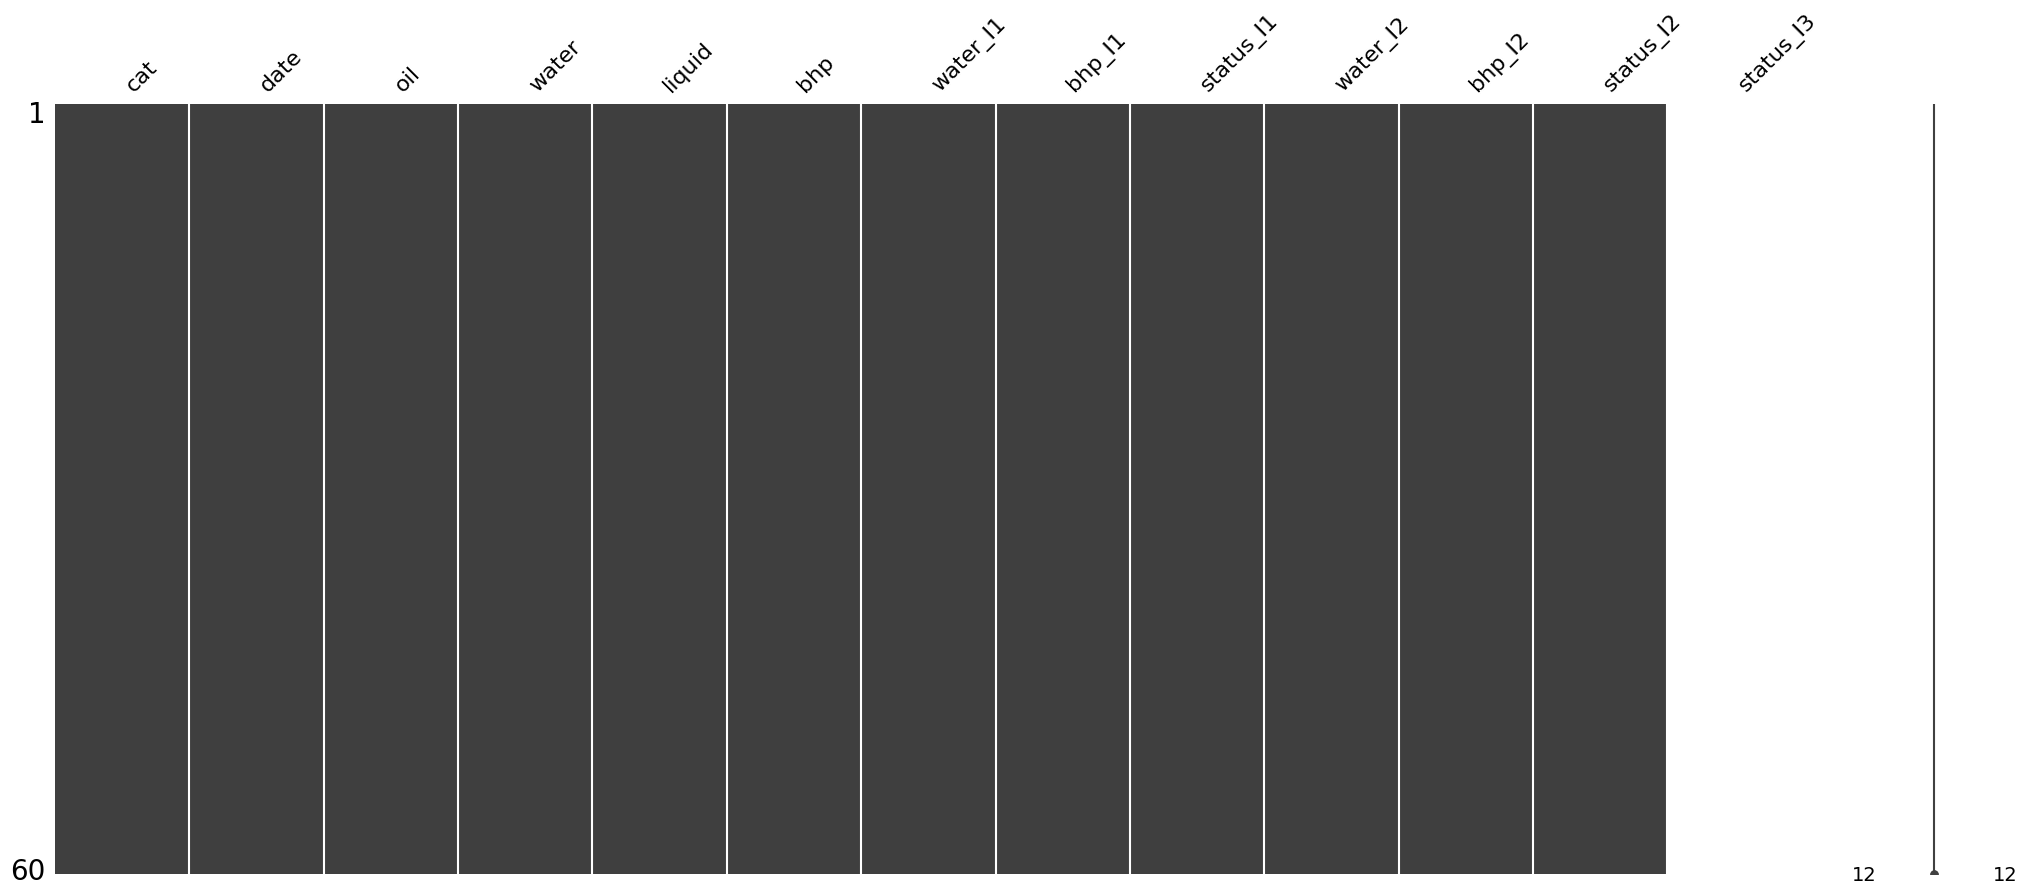

In [15]:
msno.matrix(baseline)
plt.show()

In [16]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0)

sel.fit(non_baseline.drop(['cat'], axis=1))

cols2keep = non_baseline.drop(['cat'], axis=1).columns[sel.get_support()]

/home/zeinovich/anaconda3/envs/kaggle1/lib/python3.9/site-packages/sklearn/feature_selection/_variance_threshold.py:104: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/zeinovich/anaconda3/envs/kaggle1/lib/python3.9/site-packages/sklearn/feature_selection/_variance_threshold.py:112: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


In [17]:
data_clean = non_baseline[['cat'] + list(cols2keep)]

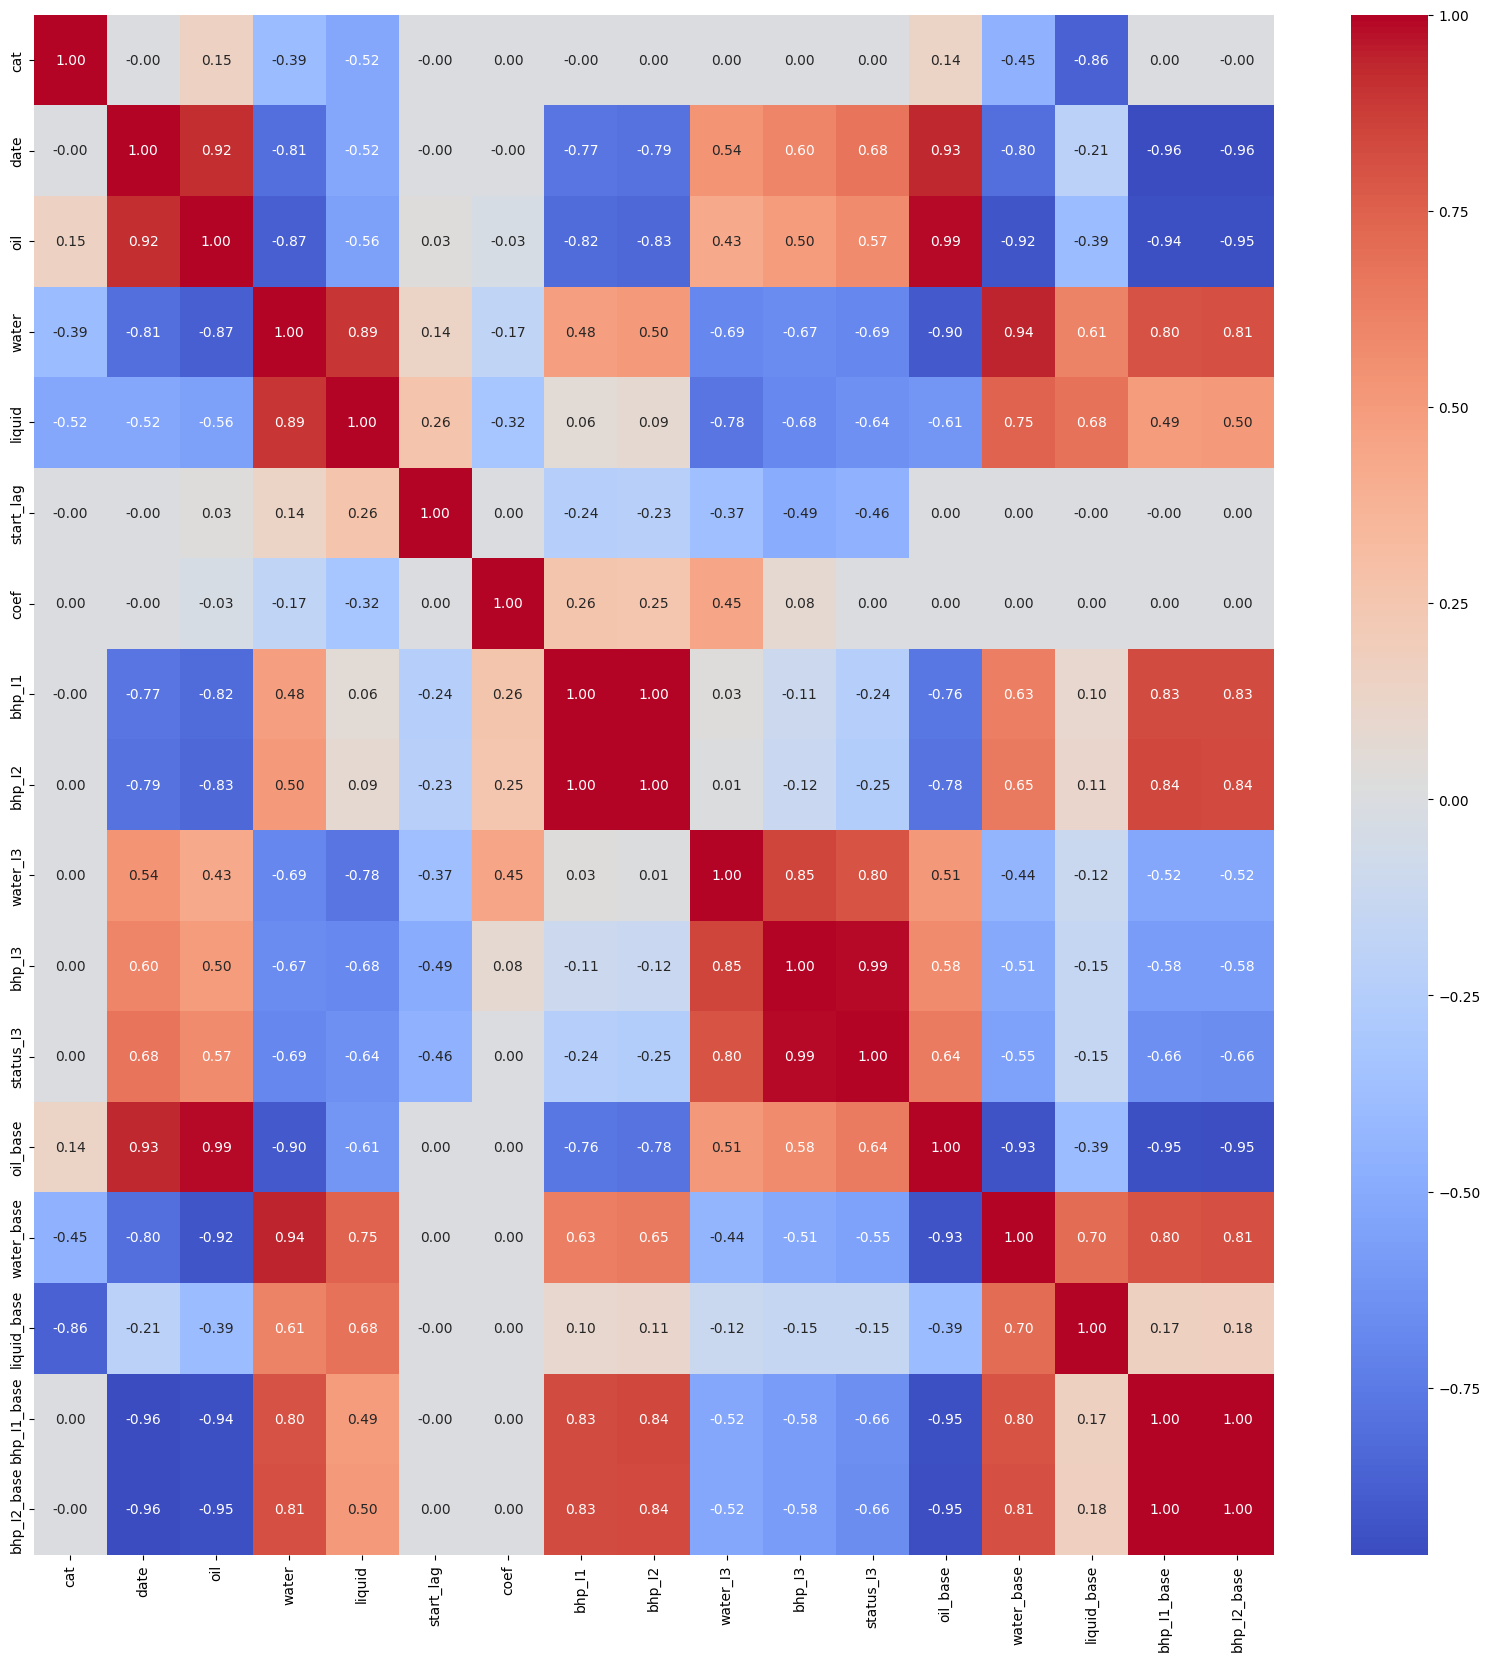

In [18]:
corr = data_clean.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')    
plt.show()

In [19]:
#data_cleaned = data_clean.drop(to_drop, axis=1)
data_cleaned = data_clean.copy()

data_lagged = data_cleaned.join(data_cleaned.groupby(['cat', 'start_lag', 'coef'])
                                        .shift(1)
                                        .add_suffix('_1d_ago')
                                        ).fillna(0)

for i in range(2, 28):
    data_lagged = data_lagged.join(data_cleaned.groupby(['cat', 'start_lag', 'coef'])
                                             .shift(i)
                                             .add_suffix(f'_{i}d_ago')
                                             ).fillna(0)
    

In [20]:
data_lagged['delta_baseline'] = data_lagged['oil'] - data_lagged['oil_base']

In [21]:
data_lagged = data_lagged.drop(['water_I3', 'bhp_I1', 'bhp_I2', 'bhp_I3'], axis=1)

In [22]:
from sklearn.metrics import mean_absolute_percentage_error

/home/zeinovich/anaconda3/envs/kaggle1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zeinovich/anaconda3/envs/kaggle1/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


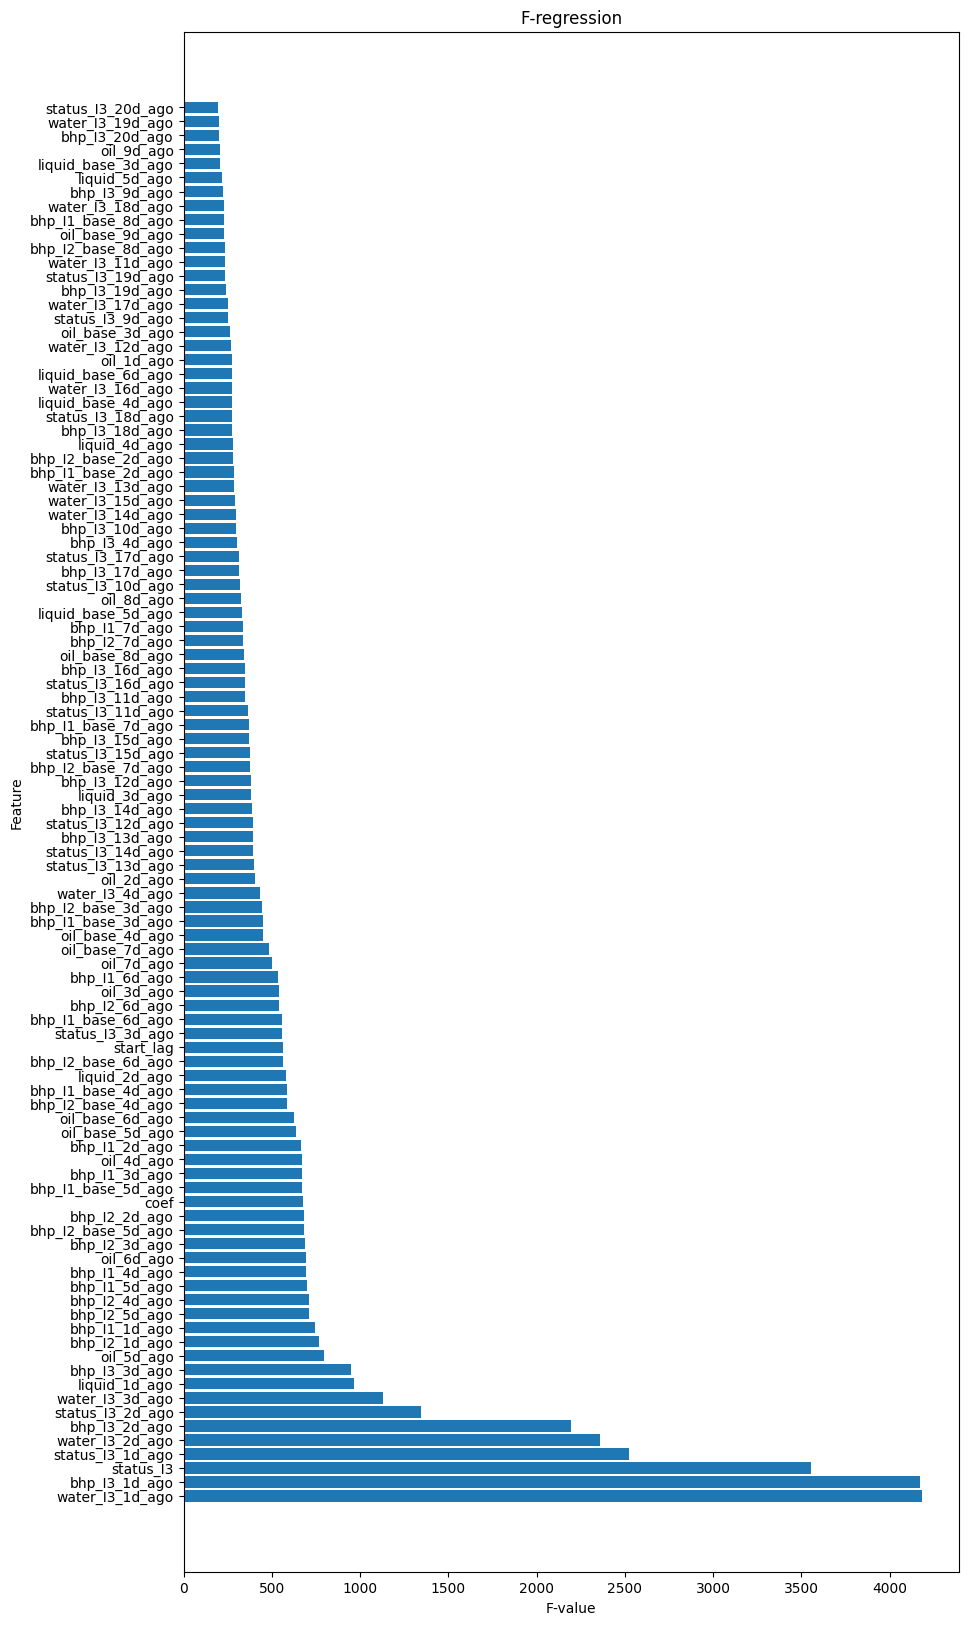

In [23]:
from sklearn.feature_selection import f_regression

f_reg = f_regression(data_lagged.drop(['oil', 'water', 'liquid', 'delta_baseline'], axis=1), 
                     data_lagged[['delta_baseline']])

f_features = (pd.DataFrame({
                        'feature': (
                                     data_lagged
                                     .drop(['oil', 'water', 'liquid', 'delta_baseline'], axis=1)
                                     .columns
                                     ), 
                        'importance': f_reg[0]
                        })
                        .sort_values('importance', ascending=False)
            )

plt.figure(figsize=(10, 20))
plt.barh(f_features[:100].feature, f_features[:100].importance)
plt.title('F-regression')
plt.xlabel('F-value')
plt.ylabel('Feature')
plt.show()

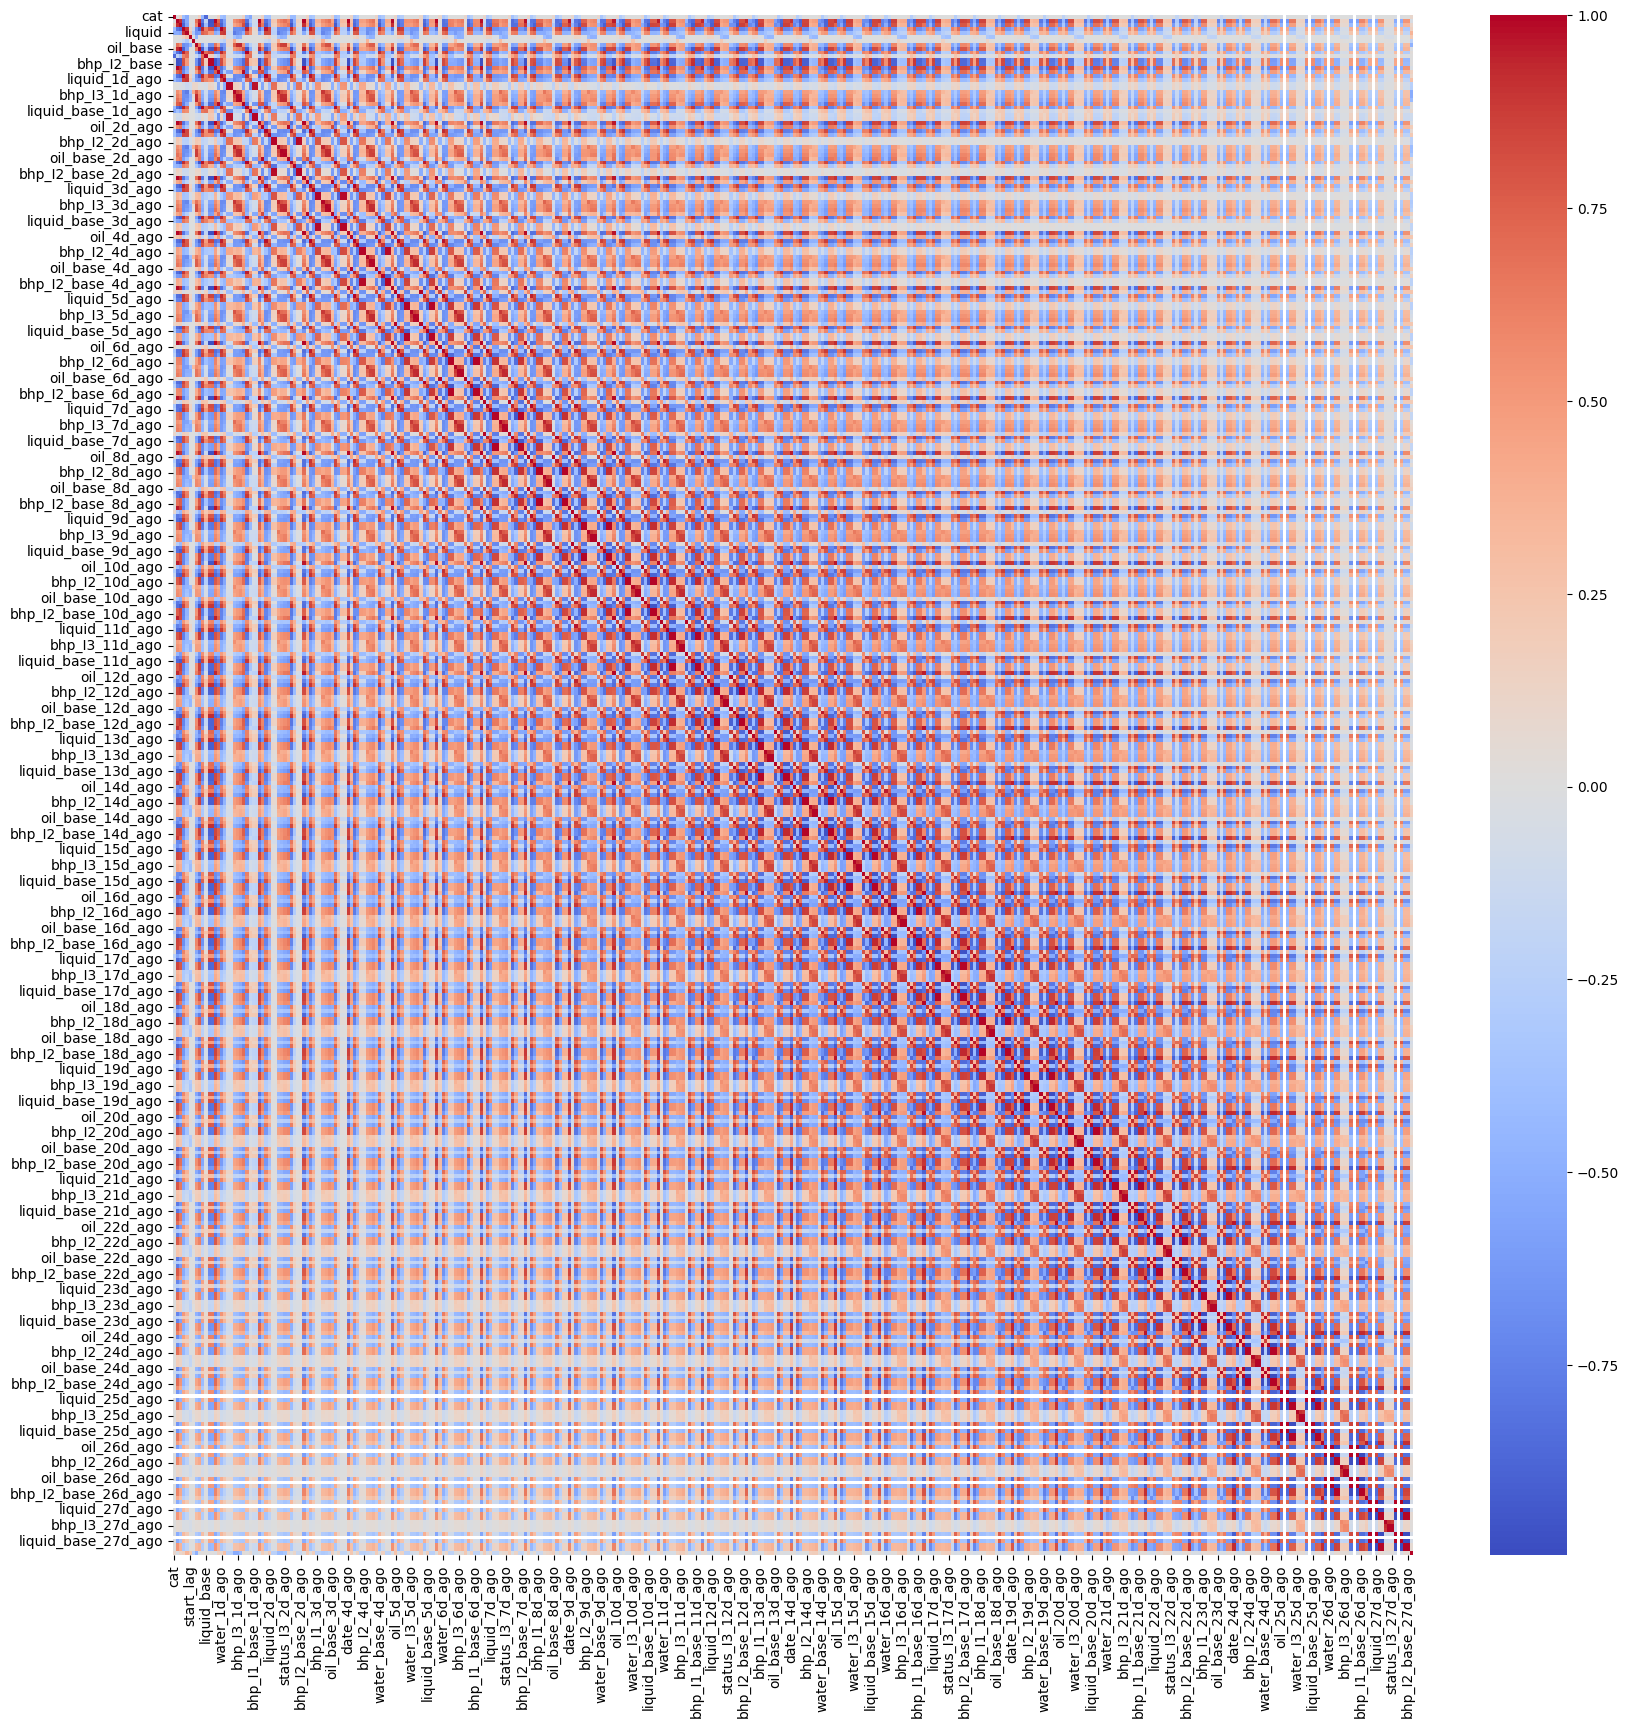

In [24]:
corr = data_lagged.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [25]:
def train_fn(data, model, horizon, cols):    
    train = data[data.date < horizon]
    test = data[(data.date >= horizon) & (data.date < horizon + 3)]

    for days_past, day in enumerate(test.date.unique()):
        for col in test.columns:
            for past in range(days_past + 1):
                if f'{past}d_ago' in col:
                    test.loc[test.date == day, col] = -1

    if cols is None:
        cols = data.columns.tolist()
        for col in ['oil', 'water', 'liquid', 'delta_baseline']:
            cols.remove(col)
    
    
    model.fit(X=train[cols], y=train.delta_baseline)
    y_pred = model.predict(test[cols])    
    return mean_absolute_percentage_error(test.oil, y_pred + test.oil_base) * 100

In [26]:
def train_model(data, model, cols, stride=1):    
    mapes = [train_fn(data, model, i, cols) for i in range(2, 27, stride)]
    
    plt.bar(range(3, 28, stride), mapes)
    plt.title(f'MAPE for {model.__class__.__name__}, Mean = {np.mean(mapes):.2f}%')
    plt.xlabel('Horizon, day')
    plt.ylabel('MAPE, %')
    plt.show()
    return model

In [27]:
cols = f_features[:50].feature.tolist()
cols += ['cat', 'start_lag', 'coef', 'date']
cols = list(set(cols))
len(cols)

52

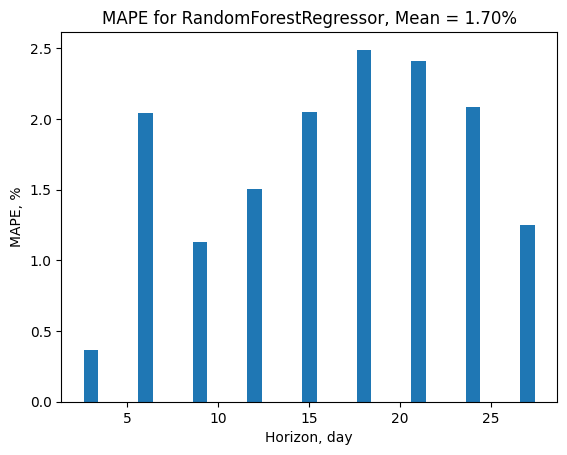

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = train_model(data_lagged, RandomForestRegressor(), stride=3,  cols=None)

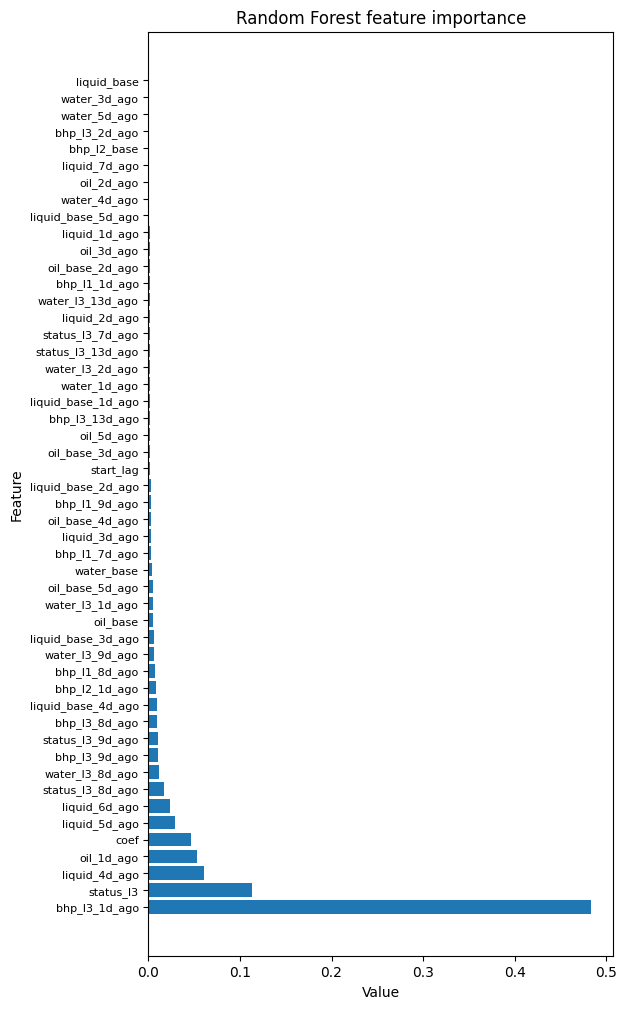

In [29]:
features = (pd.DataFrame({
                          'feature': rf.feature_names_in_,
                          'importance': rf.feature_importances_
                         })      
                          .sort_values('importance', ascending=False))

plt.figure(figsize=(6, 12))
plt.barh(features[:50].feature, features[:50].importance)
plt.title('Random Forest feature importance')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.yticks(fontsize=8)
plt.show()

44


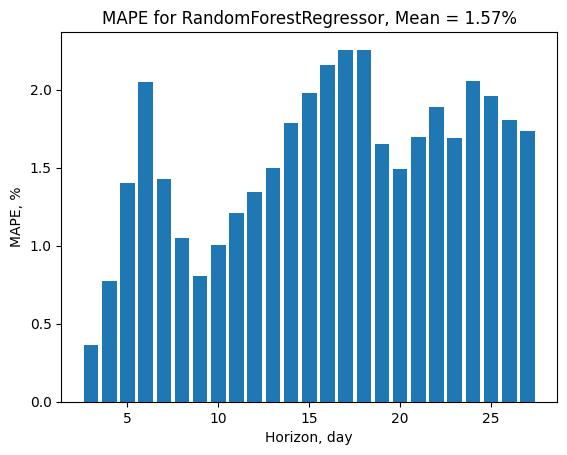

In [30]:
cols = features[features.importance > 0.001].feature.tolist()

print(len(cols))
cols = list(set(cols))

rf = train_model(data_lagged, RandomForestRegressor(), stride=1, cols=cols)

In [31]:
cols

['water_I3_13d_ago',
 'liquid_base_5d_ago',
 'water_I3_9d_ago',
 'water_4d_ago',
 'liquid_base_4d_ago',
 'liquid_base_3d_ago',
 'bhp_I3_13d_ago',
 'water_1d_ago',
 'oil_5d_ago',
 'liquid_6d_ago',
 'status_I3',
 'bhp_I1_1d_ago',
 'oil_base',
 'water_I3_1d_ago',
 'liquid_base_2d_ago',
 'water_I3_8d_ago',
 'bhp_I1_9d_ago',
 'bhp_I1_7d_ago',
 'status_I3_13d_ago',
 'water_base',
 'liquid_base_1d_ago',
 'bhp_I2_1d_ago',
 'bhp_I3_8d_ago',
 'liquid_3d_ago',
 'oil_3d_ago',
 'oil_base_3d_ago',
 'liquid_5d_ago',
 'oil_base_2d_ago',
 'oil_2d_ago',
 'oil_base_5d_ago',
 'status_I3_7d_ago',
 'bhp_I3_1d_ago',
 'status_I3_8d_ago',
 'bhp_I1_8d_ago',
 'liquid_4d_ago',
 'liquid_2d_ago',
 'oil_1d_ago',
 'water_I3_2d_ago',
 'bhp_I3_9d_ago',
 'liquid_1d_ago',
 'start_lag',
 'status_I3_9d_ago',
 'oil_base_4d_ago',
 'coef']

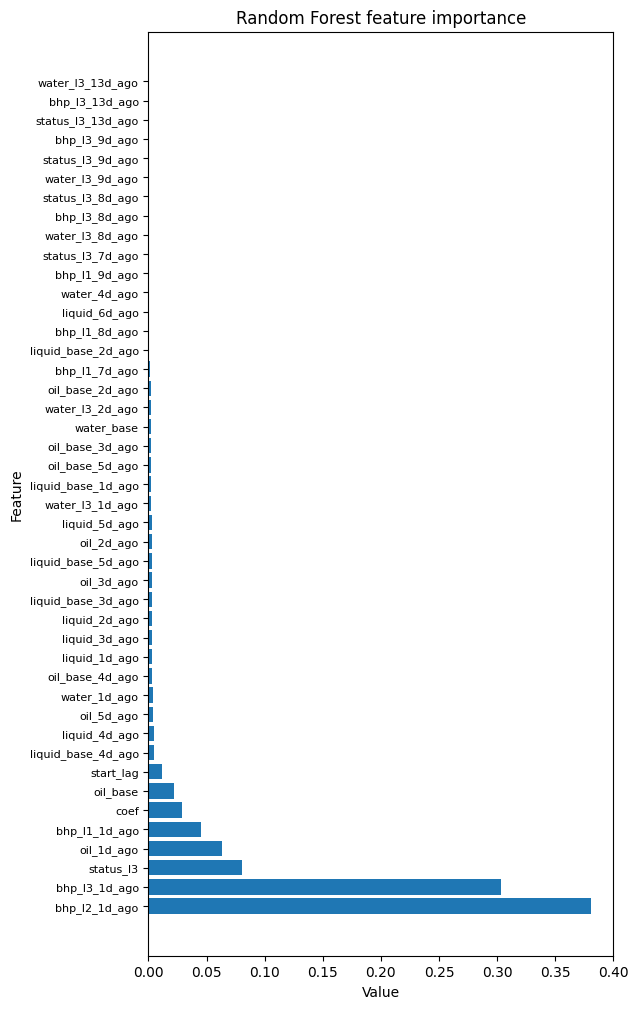

In [35]:
features2 = (pd.DataFrame({
                            'feature': rf.feature_names_in_,
                            'importance': rf.feature_importances_
                            })      
                            .sort_values('importance', ascending=False))

plt.figure(figsize=(6, 12))
plt.barh(features2.feature, features2.importance)
plt.title('Random Forest feature importance')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.yticks(fontsize=8)
plt.show()

In [33]:
def pred_ints(model: RandomForestRegressor, X: pd.DataFrame, percentile=95):
    err_down = []
    err_up = []
    
    for x in range(len(X)):
        preds = [pred.predict(np.array(X.iloc[x], ndmin=2)) for pred in model.estimators_]
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))

    return np.array(err_down), np.array(err_up)

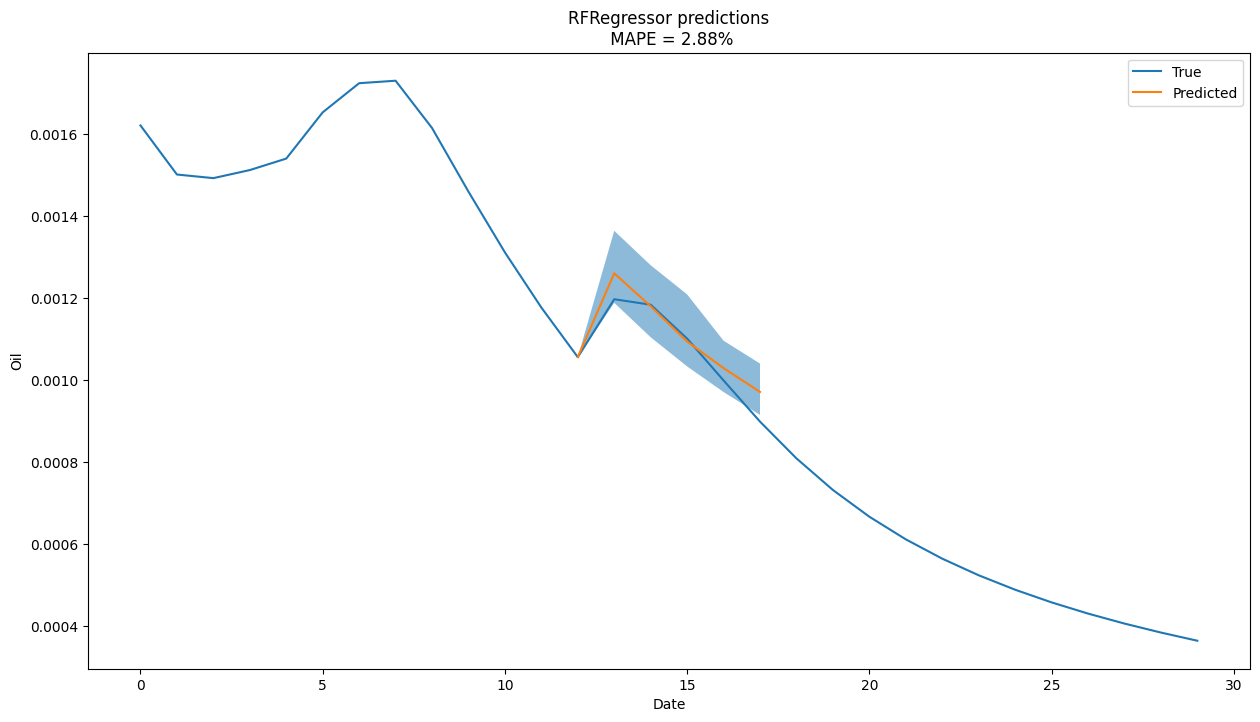

In [37]:
DATE = 12
HORIZON = 6
COEF = 0.67
LAG = 12
CAT = 1

train = data_lagged[(data_lagged.date < DATE) &
                    (data_lagged.cat == CAT)]

test = data_lagged[(data_lagged.date >= DATE) & (data_lagged.date < DATE + HORIZON) &
                    (data_lagged.coef == COEF) &
                    (data_lagged.start_lag == LAG) &
                    (data_lagged.cat == CAT)]

for days_past, day in enumerate(test.date.unique()):
    for col in test.columns:
        for past in range(days_past + 1):
            if f'{past}d_ago' in col:
                test.loc[test.date == day, col] = -1

X_sample = test[cols]
y_sample = test.delta_baseline

X_train = train[cols]
y_train = train.delta_baseline
rf.fit(X_train, y_train)

sample_pred = rf.predict(X_sample)
sample_lower, sample_upper = pred_ints(rf, X_sample, percentile=95)

sample_true = data_lagged[(data_lagged.start_lag == LAG) &
                          (data_lagged.coef == COEF) &
                          (data_lagged.cat == CAT)]

plt.figure(figsize=(15, 8))
plt.plot(sample_true.date, - sample_true.oil, label='True')
plt.plot(test.date, - sample_pred - test.oil_base, label='Predicted')
plt.fill_between(test.date, - sample_lower - test.oil_base, - sample_upper - test.oil_base, alpha=0.5)

plt.title(f'RFRegressor predictions\
\n MAPE = {mean_absolute_percentage_error(test.oil, sample_pred + test.oil_base) * 100:.2f}%')
plt.xlabel('Date')
plt.ylabel('Oil')
plt.legend()
plt.show()